In [18]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

# Đọc file chứa dữ liệu và in ra tiêu đề các cột

In [19]:
data = pd.read_csv('../data/electrical+grid+stability+simulated+data/Data_for_UCI_named.csv')
print(list(data.columns))
print(data.shape)

['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab', 'stabf']
(10000, 14)


In [20]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


# Vẽ đồ thị phân bổ dữ liệu stabf và số lượng mẫu

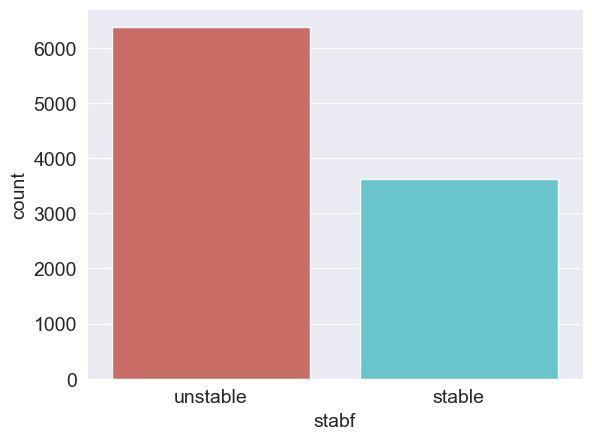

In [21]:
sns.countplot(x='stabf', data=data, palette='hls')
plt.show()

# Chuyển text cho cột đầu ra thành số 0, 1

In [22]:
cat_features = ['stabf']
for feature in cat_features:
    print(feature)
    job_list = pd.get_dummies(data[feature], prefix=feature)
    new_data = data.join(job_list)
    data = new_data
    
data.head()

stabf


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf,stabf_stable,stabf_unstable
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable,0,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable,1,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable,0,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable,0,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable,0,1


# Xóa bỏ cột chứa đầu vào không dùng

In [23]:
data_features = data.columns.values.tolist()
print(data_features)
remove_features = ['stabf', 'stabf_unstable']
to_keep_features = [feature for feature in data_features if feature not in remove_features]
data_final = data[to_keep_features]
data_final.head()

['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab', 'stabf', 'stabf_stable', 'stabf_unstable']


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf_stable
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


# Chuyển dữ liệu thành mảng

In [24]:
X = np.array(data_final.loc[:, data_final.columns != 'stabf_stable'])
print(X)

[[ 2.95906002e+00  3.07988520e+00  8.38102539e+00 ...  8.87444921e-01
   9.58033988e-01  5.53474892e-02]
 [ 9.30409723e+00  4.90252411e+00  3.04754073e+00 ...  5.62139051e-01
   7.81759911e-01 -5.95746433e-03]
 [ 8.97170691e+00  8.84842842e+00  3.04647875e+00 ...  8.39444015e-01
   1.09853245e-01  3.47087905e-03]
 ...
 [ 2.36403419e+00  2.84203025e+00  8.77639096e+00 ...  1.49286458e-01
   1.45984032e-01 -3.18098881e-02]
 [ 9.63151069e+00  3.99439760e+00  2.75707093e+00 ...  8.89118346e-01
   8.18391326e-01  3.77888091e-02]
 [ 6.53052662e+00  6.78178990e+00  4.34969522e+00 ...  3.78760930e-01
   9.42630833e-01  4.52633082e-02]]


In [25]:
y = np.array(data_final.loc[:, data_final.columns == 'stabf_stable'])
print(y)

[[0]
 [1]
 [0]
 ...
 [1]
 [0]
 [0]]


# Phân chia tập dữ liệu ra thành 2 tập: tập huấn luyện và tập kiểm tra:

In [26]:
train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.3, random_state=0)
print('##### Training and test datasets #####')
print('Training size:', len(train_targets))
print('Test size    :', len(test_targets))

##### Training and test datasets #####
Training size: 7000
Test size    : 3000


# Biến đổi kích thước ma trận dữ liệu huấn luyện kiểm tra

In [27]:
train_targets = train_targets.reshape(train_targets.shape[0])
test_targets = test_targets.reshape(test_targets.shape[0])
print(train_targets)

[0 0 0 ... 1 1 0]


# Vẽ đồ thị

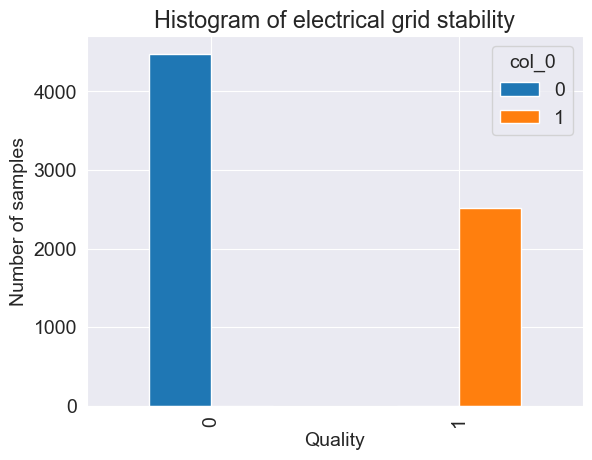

In [28]:
pd.crosstab(train_targets, train_targets).plot(kind='bar')
plt.title('Histogram of electrical grid stability')
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.rc("font", size=14)

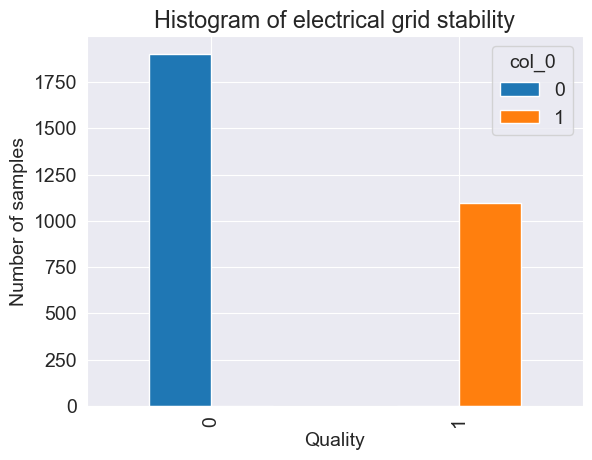

In [29]:
pd.crosstab(test_targets, test_targets).plot(kind='bar')
plt.title('Histogram of electrical grid stability')
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.rc("font", size=14)

# Tạo mô hình sử dụng thuật toán SVM, huấn luyện mô hình:

In [30]:
svmClassifier = SVC(kernel='linear', C = 1e5)
svmClassifier.fit(train_features, train_targets)
print(svmClassifier.coef_)
print(svmClassifier.intercept_)

[[-1.59118366e-01 -1.41998322e-01 -9.31492683e-02 -2.72028288e-01
  -2.78688536e-01  9.40958242e-01  4.26473872e-01 -1.08874357e+00
  -2.80727393e-01 -1.24164357e+00 -6.71718325e-01  7.30015446e-01
  -3.65262362e+03]]
[5.73277151]


# Hiển thị độ chính xác của mô hình đối với tập huấn luyện

In [31]:
train_predictions = svmClassifier.predict(train_features)
print("#### Training - Prediction results of SVM ####")
print("Target labels: ", train_targets)
print("Predictions  : ", train_predictions)

#### Training - Prediction results of SVM ####
Target labels:  [0 0 0 ... 1 1 0]
Predictions  :  [0 0 0 ... 1 1 0]


# Hiển thị kết quả đích và kết quả dự đoán của mô hình đối với tập huấn luyện

In [32]:
accuracy = accuracy_score(train_targets, train_predictions) * 100
print("##### Training - Prediction accuracy of SVM #####")
print("Accuracy of Logistic Regression: ", accuracy)
print(classification_report(train_targets, train_predictions))

##### Training - Prediction accuracy of SVM #####
Accuracy of Logistic Regression:  99.82857142857144
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4478
           1       1.00      1.00      1.00      2522

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000


# Hiển thị độ chính xác của mô hình đối với tập kiểm tra

In [33]:
test_predictions = svmClassifier.predict(test_features)
print("#### Test - Prediction results of SVM ####")
print("Target labels: ", test_targets)
print("Predictions  : ", test_predictions)

#### Test - Prediction results of SVM ####
Target labels:  [0 1 0 ... 0 0 0]
Predictions  :  [0 1 0 ... 0 0 0]


In [34]:
accuracy = accuracy_score(test_targets, test_predictions) * 100
print("##### Test - Prediction accuracy of SVM #####")
print("Accuracy of Logistic Regression: ", accuracy)
print(classification_report(test_targets, test_predictions))

##### Test - Prediction accuracy of SVM #####
Accuracy of Logistic Regression:  99.73333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1902
           1       1.00      1.00      1.00      1098

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000
